# Introduction

Dear viewers, welcome! <br>
We are **Ben Arviv** and **Daniel Dubinskey**, computer science students from the **Open University of Israel**, leaning towards the fields of *Data Science* and *Machine Learning*. <br>
In the *Data Science Workshop* (20936) we learned many tools and techniques for data analysis and machine learning, and for our final project we chose to focus on the field of *Computer Vision* and *Deep Learning*. As a result, we decided to perform a data science project on a dataset we found on Kaggle, which is called **Brain Tumor Detection**.

The main goal of the project is to contribute to the early detection and diagnosis of brain tumors, which aims to provide valuable support to medical professionals in creating effective treatment plans. The dataset consists of brain scans and has a diverse range of brain tumor images that are annotated to highlight the tumor regions.

## The Problem

Brain tumor detection presents multifaceted challenges stemming from the complexity and heterogeneity of brain tumors, coupled with the limitations of current diagnostic techniques. Early detection is hindered by the nonspecific nature of symptoms in the initial stages, often leading to delayed diagnosis until tumors have progressed. <br>
Imaging modalities like MRI and CT scans, while essential, require expert interpretation and may miss subtle or small tumors, especially given the intricate anatomy of the brain. Furthermore, invasive biopsy procedures for definitive diagnosis pose risks and are not always feasible or desirable. Tumor heterogeneity exacerbates the difficulty in developing universal detection methods, and the overlap of tumor tissue with normal brain structures complicates interpretation.

Access to advanced imaging and diagnostic procedures, along with the high cost, further exacerbates disparities in healthcare access. Moreover, the need for large, diverse datasets for training AI algorithms adds another layer of complexity. Addressing these challenges necessitates collaborative efforts across disciplines to innovate non-invasive detection methods, improve imaging technology, and harness AI for more accurate and accessible brain tumor diagnosis, ultimately improving patient outcomes.

In this computer vision project, we aim to develop a brain tumor detection system leveraging a dataset comprising brain scans as input images and corresponding labels denoting the coordinates of brain tumors, where present. By harnessing advanced image processing and deep learning techniques, our objective is to accurately identify and localize brain tumors within medical imaging data. The dataset serves as a critical resource for training and evaluating our model, enabling it to learn complex patterns and features indicative of tumor presence. Through precise localization of tumors within brain scans, our system can assist healthcare professionals in early diagnosis, treatment planning, and monitoring of patients with neurological conditions. By automating the detection process, we aim to enhance efficiency, reduce human error, and ultimately improve patient outcomes in the diagnosis and management of brain tumors.

# Exploratory Data Analysis (EDA)

In order to understand the dataset and the problem we are dealing with, we will perform an exploratory data analysis (EDA) to get a sense of the data and its characteristics. This process includes examining the distribution of the data, identifying patterns and trends, applying dimensionality reduction and clustering techniques, and visualizing the data to gain insights. EDA is a crucial step in the data science process, as it helps us understand the data, identify potential issues, and inform subsequent steps in the analysis and modeling process.

In [19]:
import os
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [20]:
# Set the path to the dataset
train_img_path = "train/images"
train_lbl_path = "train/labels"

It appears that the images are in `jpg` format, and the labels are in `txt` format. We will start by loading the data and examining the contents of the dataset.

In [21]:
os.listdir(train_img_path)[:5]

['volume_100_slice_100_jpg.rf.ac33e0ac3a1eebeb5e262e8a6f7de5d9.jpg',
 'volume_100_slice_101_jpg.rf.1984ae9f91c255104509b3da84cf1be6.jpg',
 'volume_100_slice_107_jpg.rf.db31be1f34abd48ca231dc24f59bd81c.jpg',
 'volume_100_slice_109_jpg.rf.77e7e40278b0f20bf3237a6da62cf6ba.jpg',
 'volume_100_slice_110_jpg.rf.0d6e7f8324e5cf7d43bfef073cae18f8.jpg']

Each label file contains zero or more rows, each row contains an index number and the coordinates of the tumor in the image. The coordinates are in the format `(x, y, width, height)`, where `(x, y)` is the center of the bounding box, and `width` and `height` are the dimensions of the bounding box. We will use this information to visualize the bounding boxes on the images and gain insights into the distribution and characteristics of the tumors.

In [22]:
file_paths = [os.path.join(train_lbl_path, file) for file in os.listdir(train_lbl_path)[:5]]

files = []
for file_path in file_paths:
    with open(file_path, 'r') as file:
        files.append(file.read())

files


['1 0.6151079136690647 0.24242424242424243 0.39568345323741005 0.3484848484848485',
 '1 0.6223021582733813 0.24242424242424243 0.381294964028777 0.3484848484848485',
 '1 0.6510791366906474 0.20454545454545456 0.23741007194244604 0.24242424242424243',
 '1 0.7122302158273381 0.26515151515151514 0.07194244604316546 0.10606060606060606',
 '1 0.7086330935251799 0.2537878787878788 0.03597122302158273 0.06818181818181818']

Using the `cv2` library, we can read the images properly.

In [23]:
# Load train images
images = []
for file in os.listdir(train_img_path):
    img = cv2.imread(os.path.join(train_img_path, file))
    images.append(img)


Each image is a 3D array, where the first two dimensions represent the pixel values of the image, and the third dimension represents the color channels (RGB). 

In [25]:
images[0]

array([[[11, 12, 10],
        [11, 12, 10],
        [11, 12, 10],
        ...,
        [11, 12, 10],
        [11, 12, 10],
        [11, 12, 10]],

       [[11, 12, 10],
        [11, 12, 10],
        [11, 12, 10],
        ...,
        [11, 12, 10],
        [11, 12, 10],
        [11, 12, 10]],

       [[11, 12, 10],
        [11, 12, 10],
        [11, 12, 10],
        ...,
        [11, 12, 10],
        [11, 12, 10],
        [11, 12, 10]],

       ...,

       [[11, 12, 10],
        [11, 12, 10],
        [11, 12, 10],
        ...,
        [11, 12, 10],
        [11, 12, 10],
        [11, 12, 10]],

       [[11, 12, 10],
        [11, 12, 10],
        [11, 12, 10],
        ...,
        [11, 12, 10],
        [11, 12, 10],
        [11, 12, 10]],

       [[11, 12, 10],
        [11, 12, 10],
        [11, 12, 10],
        ...,
        [11, 12, 10],
        [11, 12, 10],
        [11, 12, 10]]], dtype=uint8)

We will create a *DataFrame* object to store the labels, with each row representing an image and its corresponding tumor coordinates, sizes and average size (if present). This will allow us to easily access and manipulate the labels, and merge them with the image data for visualization and analysis.

In [26]:
# Load train labels
labels = pd.DataFrame(columns=['number of tumors', 'list of tumors', 'sizes of tumors'])

for i, file_path in enumerate(os.listdir(train_lbl_path)):
    file_path = os.path.join(train_lbl_path, file_path)
    with open(file_path, 'r') as file:
        lines = file.readlines()
        boxes_list = []
        sizes_list = []
        if len(lines) == 0:
            labels.loc[i] = [0, [], []]
            continue
        
        img_width, img_height = images[i].shape[:2]
        for line in lines:
            line = line.strip().split()
            
            _, x, y, width, height = list(map(float, line))
            xmin = (x - width / 2) * img_width
            ymin = (y - height / 2) * img_height
            xmax = (x + width / 2) * img_width
            ymax = (y + height / 2) * img_height
            
            size = (width / img_width) * (height / img_height)
            sizes_list.append([size])
            boxes_list.append([xmin, ymin, xmax, ymax])
        
        labels.loc[i] = [len(boxes_list), boxes_list, sizes_list]
        
labels['average tumor size'] = labels['sizes of tumors'].apply(lambda x: np.mean(x) if len(x) > 0 else 0)
            

In [27]:
labels.head()

,number of tumors,list of tumors,sizes of tumors,average tumor size
0,1,"[[55.07913669064747, 9.477272727272727, 107.30...",[[7.515243527872274e-06]],7.515244e-06
1,1,"[[56.97841726618705, 9.477272727272727, 107.30...",[[7.241961945040556e-06]],7.241962e-06
2,1,"[[70.27338129496401, 11.583333333333334, 101.6...",[[3.1367972985901663e-06]],3.136797e-06
3,1,"[[89.26618705035972, 29.48484848484848, 98.762...",[[4.1586327822218113e-07]],4.158633e-07
4,1,"[[91.16546762589928, 30.53787878787879, 95.913...",[[1.3367033942855822e-07]],1.336703e-07


We begin by having a first look at the dataset, in order to understand its structure and contents.

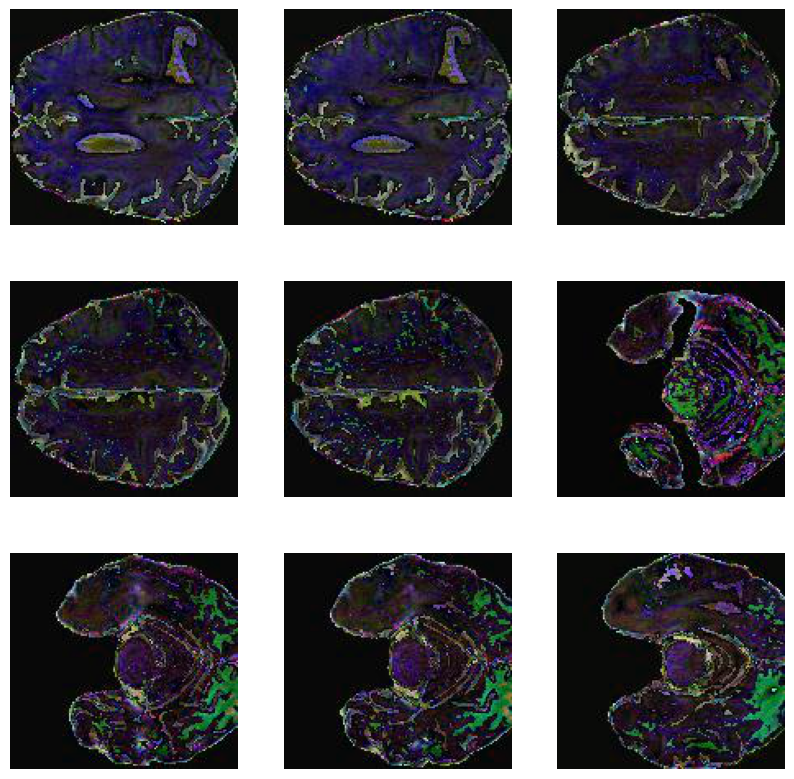

In [28]:
# Plot images
fig, axes = plt.subplots(3, 3, figsize=(10, 10))
for i, ax in enumerate(axes.flatten()):
    ax.imshow(images[i])
    ax.axis('off')

All of the images are brain scans, in what appears to be different topographical views of the brain, according to the actual brain scan and color of the image. All of the images are of the same size, and they may or may not contain tumors. 

All of the images are of the same aspect ratio, which is a good thing, as it will allow us to train a model on the images without having to worry about resizing them.

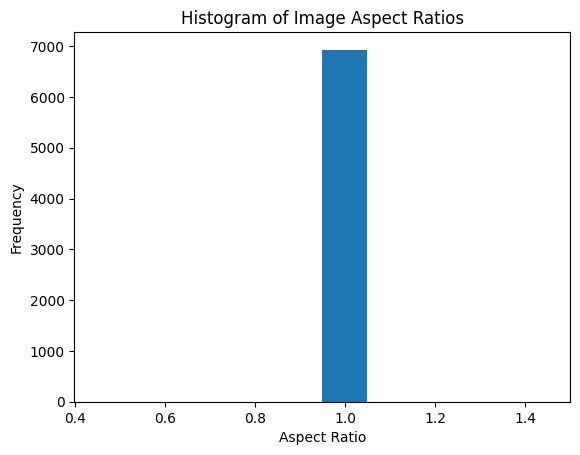

In [29]:
# Calculate the aspect ratio of each image
img_width, img_height = images[i].shape[:2]
aspect_ratios = [img_width / img_height for img_width, img_height in [img.shape[:2] for img in images]]

# Plot the histogram
plt.hist(aspect_ratios, bins=10)
plt.xlabel('Aspect Ratio')
plt.ylabel('Frequency')
plt.title('Histogram of Image Aspect Ratios')
plt.show()


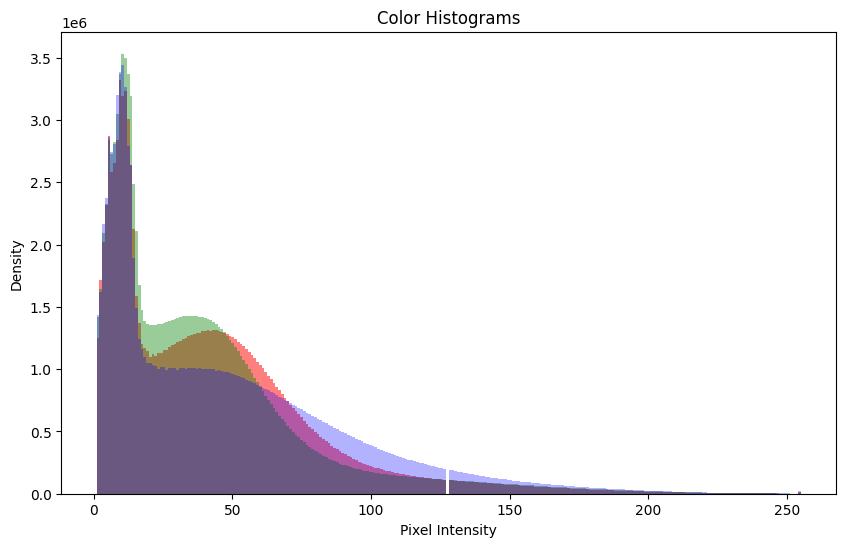

In [30]:
# Flatten the images and separate color channels
red = np.array([image[:, :, 0].flatten() for image in images]).flatten()
green = np.array([image[:, :, 1].flatten() for image in images]).flatten()
blue = np.array([image[:, :, 2].flatten() for image in images]).flatten()

red = red[red != 0]
green = green[green != 0]
blue = blue[blue != 0]

plt.figure(figsize=(10, 6))
plt.hist(red, bins=256, density=False, color='red', alpha=0.5)
plt.hist(green, bins=256, density=False, color='green', alpha=0.4)
plt.hist(blue, bins=256, density=False, color='blue', alpha=0.3)

plt.title('Color Histograms')
plt.xlabel('Pixel Intensity')
plt.ylabel('Density')
plt.show()

In [31]:
red_palette = sns.color_palette("Reds", 256)

From the above histogram we can infer that most of the images contain the same pixel intensity, which means that they show the same layout of the brain, in terms of resolution.

<Axes: xlabel='number of tumors', ylabel='count'>

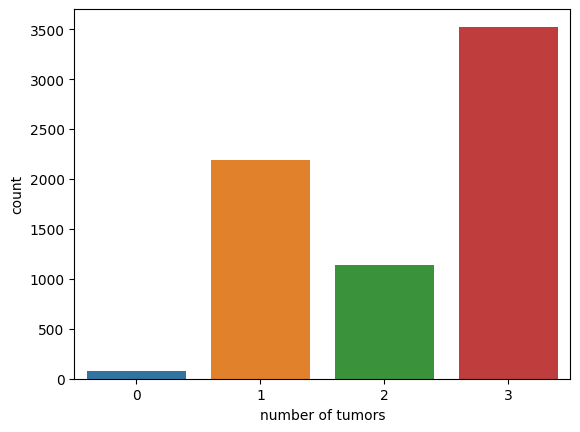

In [32]:
sns.countplot(x='number of tumors', data=labels)

As we can see, the dataset contains images with varying numbers of tumors, ranging from zero to three tumors per image, in the training set. The vast majority of images contain at least one tumor, but there is a small amount of images with no tumors. It appears that the distribution of tumors is skewed, with a higher proportion of images containing tumors compared to those without tumors. It may lead to a class imbalance problem, which we will need to address during the modeling phase.

Most of the tumors are of a similar size, but there are some with larger sizes, and the plot is quite narrow, which means that the sizes of the tumors are quite similar. We can see that the plot is skewed to the right, which means that most of the tumors are small, but there are some larger tumors as well. No noticable outliers are present in the data.

Text(0.5, 1.0, 'Average Tumor Size Distribution')

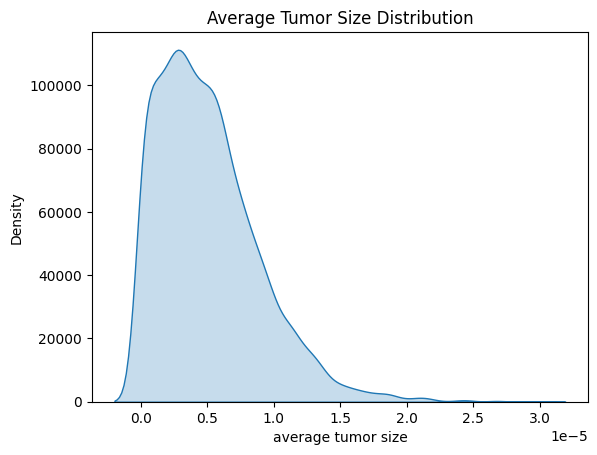

In [33]:
sns.kdeplot(labels['average tumor size'], fill=True)
plt.title('Average Tumor Size Distribution')

It may look like larger tumors are more common when there are multiple tumors in the image, with most of the tumor sizes being in the higher range of the scale, with respect to the average tumor size for scans with one tumor. This is not a deterministic conclusion, but it is a trend that we can see in the data.

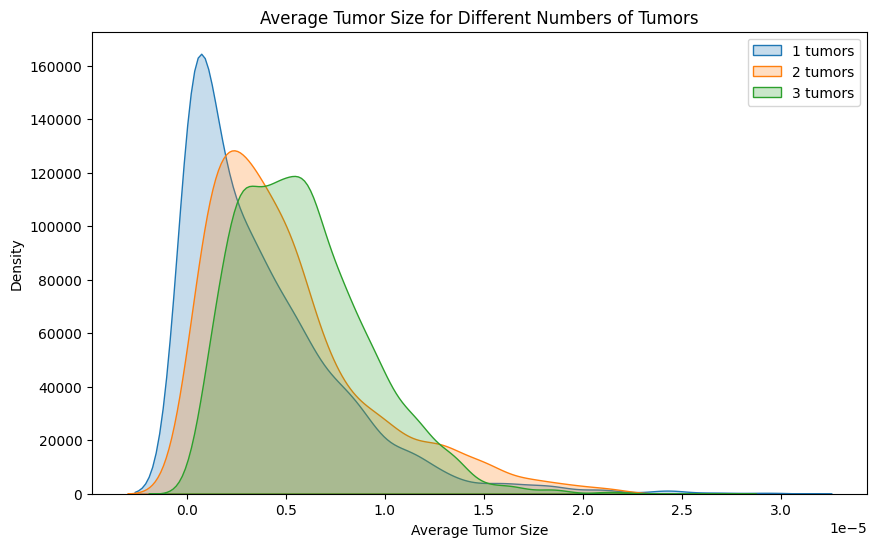

In [34]:
plt.figure(figsize=(10, 6))

# Create a separate KDE plot for each number of tumors from 1 to 3
for i in range(1, 4):
    subset = labels[labels['number of tumors'] == i]['average tumor size']
    sns.kdeplot(subset, label=f'{i} tumors', fill=True)

plt.title('Average Tumor Size for Different Numbers of Tumors')
plt.xlabel('Average Tumor Size')
plt.ylabel('Density')
plt.legend()
plt.show()

The following plot shows the distribution of the aspect ratios of the tumors in the dataset. The aspect ratio is calculated as the ratio of the width to the height of the bounding box. It provides insights into the shape and orientation of the tumors, which can be useful for understanding the characteristics of the tumors and designing appropriate detection algorithms. In our dataset, the aspect ratios of the tumors are relatively identical, with most of the tumors having an aspect ratio close to 1. This indicates that the tumors are approximately square in shape.

Text(0.5, 1.0, 'Tumor Aspect Ratio Distribution')

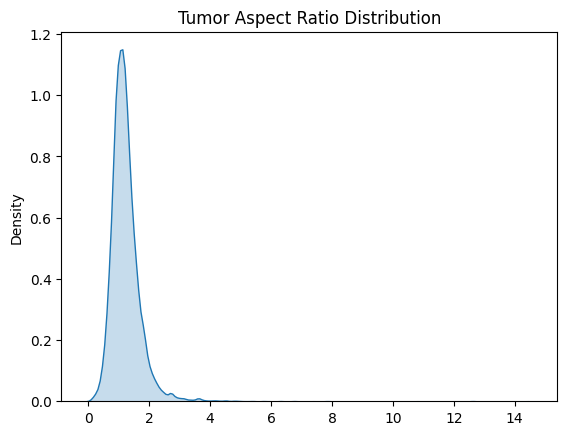

In [35]:
tumors = labels['list of tumors']
tumors = [tumor for tumor_list in tumors for tumor in tumor_list]
tumors_df = pd.DataFrame(tumors, columns=['xmin', 'ymin', 'xmax', 'ymax'])

width = tumors_df['xmax'] - tumors_df['xmin']
height = tumors_df['ymax'] - tumors_df['ymin']
aspect_ratios = width / height

sns.kdeplot(aspect_ratios, fill=True)
plt.title('Tumor Aspect Ratio Distribution')


We can see that the number of tumors in the images is not correlated with the aspect ratio of the tumors. The aspect ratio of the tumors is relatively consistent across images with different numbers of tumors, with most tumors having an aspect ratio close to 1. This suggests that the shape and orientation of the tumors are similar regardless of the number of tumors in the image.

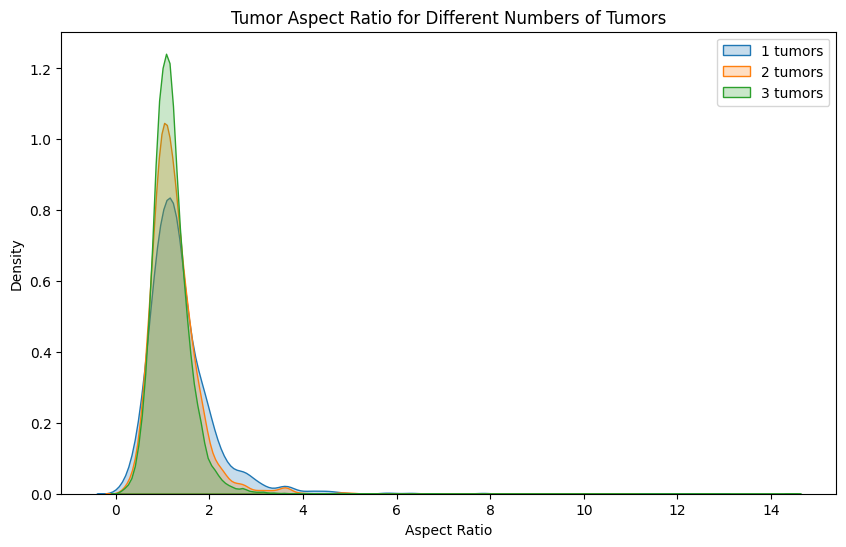

In [39]:
plt.figure(figsize=(10, 6))

# Create a separate KDE plot for each number of tumors from 1 to 3
for i in range(1, 4):
    tumors = labels[labels['number of tumors'] == i]['list of tumors']
    tumors = [tumor for tumor_list in tumors for tumor in tumor_list]
    tumors_df = pd.DataFrame(tumors, columns=['xmin', 'ymin', 'xmax', 'ymax'])
    
    width = tumors_df['xmax'] - tumors_df['xmin']
    height = tumors_df['ymax'] - tumors_df['ymin']
    aspect_ratios = width / height
    
    sns.kdeplot(aspect_ratios, label=f'{i} tumors', fill=True)
    
plt.title('Tumor Aspect Ratio for Different Numbers of Tumors')
plt.xlabel('Aspect Ratio')
plt.ylabel('Density')
plt.legend()
plt.show()